<a href="https://colab.research.google.com/github/Ayushi2280/The-WallStreet-Mogul/blob/master/dbscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

In [ ]:
import pandas as pd
import yfinance as yf
from datetime import datetime
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
plt.style.use('fivethirtyeight')

In [ ]:
stock_list = ['ADANIPORTS.NS','ARVIND.NS', 'ASIANPAINT.NS', 'AXISBANK.NS', 'BAJAJ-AUTO.NS', 'BAJFINANCE.NS', 'BAJAJFINSV.NS', 'BHARTIARTL.NS', 'BPCL.NS', 'BRITANNIA.NS','CIPLA.NS', 'COALINDIA.NS', 'DIVISLAB.NS', 'DRREDDY.NS', 'EICHERMOT.NS', 'GILLETTE.NS', 'GOKEX.NS', 'GRASIM.NS', 'HCLTECH.NS', 'HDFC.NS', 'HDFCBANK.NS', 'HEROMOTOCO.NS', 'HINDALCO.NS', 'HINDUNILVR.NS', 'IBREALEST.NS', 'ICICIBANK.NS', 'INDUSINDBK.NS', 'INFY.NS', 'IOC.NS',  'ITC.NS', 'JSWSTEEL.NS', 'KOTAKBANK.NS', 'LT.NS', 'M&M.NS', 'MARUTI.NS', 'NESTLEIND.NS', 'NTPC.NS', 'ONGC.NS', 'POWERGRID.NS', 'RELIANCE.NS', 'SBIN.NS', 'SBILIFE.NS', 'SHREECEM.NS', 'SUNPHARMA.NS', 'TATAMOTORS.NS', 'TATASTEEL.NS',  'TCS.NS', 'TATACONSUM.NS', 'TECHM.NS', 'TITAN.NS', 'ULTRACEMCO.NS', 'UPL.NS','WIPRO.NS']

In [ ]:
stockStartDate = '2010-11-04'
today = datetime.today().strftime('%Y-%m-%d')

In [ ]:
data = yf.download(stock_list, stockStartDate, today)['Adj Close']
print(data)

[*********************100%***********************]  53 of 53 completed
            ADANIPORTS.NS   ARVIND.NS  ...      UPL.NS    WIPRO.NS
Date                                   ...                        
2010-11-04     151.755432   17.963017  ...  123.952660  146.501938
2010-11-08     151.943665   18.721392  ...  122.698860  144.640274
2010-11-09     152.743912   19.078272  ...  120.482811  144.791245
2010-11-10     150.531570   19.687944  ...  120.891037  146.434860
2010-11-11     146.295212   19.658201  ...  119.316483  143.784927
...                   ...         ...  ...         ...         ...
2021-11-30     683.849976  116.900002  ...  681.700012  637.250000
2021-12-01     707.950012  115.699997  ...  690.500000  634.799988
2021-12-02     739.099976  116.500000  ...  698.200012  646.799988
2021-12-03     737.450012  116.849998  ...  712.750000  640.750000
2021-12-06     723.450012  112.199997  ...  716.549988  624.500000

[2731 rows x 53 columns]


In [ ]:
daily_returns = data.pct_change()
annual_mean_returns = daily_returns.mean() * 252
annual_return_variance = daily_returns.var() * 252

In [ ]:
stocks = pd.DataFrame(data.columns, columns=['Stock_Symbols'])
stocks['Variances'] = annual_return_variance.values
stocks['Returns'] = annual_mean_returns.values
stocks

,Stock_Symbols,Variances,Returns
0,ADANIPORTS.NS,0.148152,0.218394
1,ARVIND.NS,0.222087,0.278916
2,ASIANPAINT.NS,0.067966,0.266923
3,AXISBANK.NS,0.135200,0.145920
4,BAJAJ-AUTO.NS,0.067556,0.125103
5,BAJAJFINSV.NS,0.124025,0.393426
6,BAJFINANCE.NS,0.137940,0.489101
7,BHARTIARTL.NS,0.106081,0.135850
8,BPCL.NS,0.123185,0.212782
9,BRITANNIA.NS,0.069300,0.308618


In [ ]:
X = stocks.drop('Stock_Symbols', axis = 1)
  
X.fillna(method ='ffill', inplace = True)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
  
X_normalized = normalize(X_scaled)
  
X_normalized = pd.DataFrame(X_normalized)

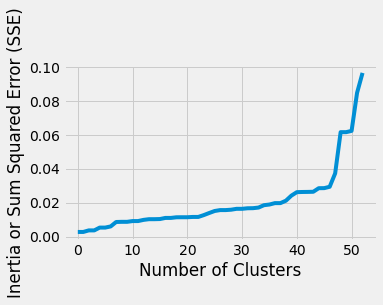

In [ ]:
from sklearn.neighbors import NearestNeighbors 
neighb = NearestNeighbors(n_neighbors=2)
nbrs=neighb.fit(x) 
distances,indices=nbrs.kneighbors(x) 
distances = np.sort(distances, axis = 0) 
distances = distances[:, 1] 
plt.rcParams['figure.figsize'] = (5,3) 
plt.plot(distances) 
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia or Sum Squared Error (SSE)')
plt.show()

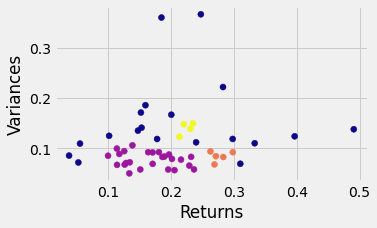

In [ ]:
dbscan = DBSCAN(eps = 0.0255, min_samples =4).fit(x) 
labels = dbscan.labels_ 
plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma") 
plt.xlabel("Returns") 
plt.ylabel("Variances") 
plt.show() 